# Create Potential Fast Transient List

Author: Melissa Graham & Midori Rollins

Identify potential fast transients from the "good" candidates created for all of the DDF.

To do this, we constrain the time spans, peak magnitudes, and amplitudes

**Short-duration transient phenomena**:

 * Short timespan (2 to 20 days) in every filter.
 * Reaches a peak of at least 22 mag in any filter.
 * Has an amplitude of at least 0.5 mag in any filter.

Write the list of potential SNIa to `potential_fast_transients_list.txt`.

Save the plot of every potential SNIa lightcurve in the folder `all_potential_fast_transients_plots/`.

## Set up and read in data

In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# import pandas as pd

# from copy import deepcopy
import time

In [2]:
clr = ['darkgreen', 'firebrick', 'saddlebrown', 'limegreen', 'orange', 'lightcoral']

all_filters = ['g','r','i']
all_fcolors = ['green','red','blue']
all_fshapes = ['o','s','^']
all_fsizes  = [5, 5, 7]

In [3]:
all_filters = ['g', 'r', 'i']
clr = ['darkgreen', 'firebrick', 'saddlebrown', 'limegreen', 'orange', 'lightcoral']
sym = ['o', 's', '^', 'o', 's', '^']
siz = [5, 5, 7, 5, 5, 7]

In [4]:
fnm = '../all_nightly_epochs_files/candidate_lightcurves.dat'

candLC_field = np.loadtxt(fnm, dtype='str', usecols=(0))
candLC_candid = np.loadtxt(fnm, dtype='str', usecols=(1))
candLC_caldate = np.loadtxt(fnm, dtype='str', usecols=(2))
candLC_mjd = np.loadtxt(fnm, dtype='float', usecols=(3))
candLC_filter = np.loadtxt(fnm, dtype='str', usecols=(4))
candLC_Nobj = np.loadtxt(fnm, dtype='int', usecols=(5))
candLC_mag = np.loadtxt(fnm, dtype='float', usecols=(6))
candLC_mage = np.loadtxt(fnm, dtype='float', usecols=(7))
candLC_mrb = np.loadtxt(fnm, dtype='float', usecols=(8))
candLC_lef = np.loadtxt(fnm, dtype='float', usecols=(9))

del fnm

In [5]:
fnm = '../all_nightly_epochs_files/candidate_lightcurve_parameters.dat'

paramLC_field = np.loadtxt( fnm, dtype='str', usecols=(0) )
paramLC_candid = np.loadtxt( fnm, dtype='str', usecols=(1) )
paramLC_tspan = np.loadtxt( fnm, dtype='float', usecols=(2) )
paramLC_tspan_g = np.loadtxt( fnm, dtype='float', usecols=(3) )
paramLC_tspan_r = np.loadtxt( fnm, dtype='float', usecols=(4) )
paramLC_tspan_i = np.loadtxt( fnm, dtype='float', usecols=(5) )
paramLC_minmag = np.loadtxt( fnm, dtype='float', usecols=(6) )
paramLC_minmag_g = np.loadtxt( fnm, dtype='float', usecols=(7) )
paramLC_minmag_r = np.loadtxt( fnm, dtype='float', usecols=(8) )
paramLC_minmag_i = np.loadtxt( fnm, dtype='float', usecols=(9) )
paramLC_amp = np.loadtxt( fnm, dtype='float', usecols=(10) )
paramLC_amp_g = np.loadtxt( fnm, dtype='float', usecols=(11) )
paramLC_amp_r = np.loadtxt( fnm, dtype='float', usecols=(12) )
paramLC_amp_i = np.loadtxt( fnm, dtype='float', usecols=(13) )
paramLC_neps = np.loadtxt( fnm, dtype='int', usecols=(14) )
paramLC_neps_g = np.loadtxt( fnm, dtype='int', usecols=(15) )
paramLC_neps_r = np.loadtxt( fnm, dtype='int', usecols=(16) )
paramLC_neps_i = np.loadtxt( fnm, dtype='int', usecols=(17) )

del fnm

---
## Testing other constraints

From Maria Drouts paper <a href="https://arxiv.org/abs/1405.3668">here</a>, I find a couple constraints I want to try to implement:
>1. The transient must rise by & 1.5 mag in the 9 days immediately prior to observed maximum light.

>2. The transient must decline by & 1.5 mag in ∼ 25 days post observed maximum.

These two are similar, so if I can implement one, I should be able to do the other. I'll start with `#1.` 

In [6]:
paramLC_candid.size

8982

In [7]:
np.unique(candLC_candid).size

8982

Here I'm testing one candidate (DC21baaa) to try to get this to work. I would eventually want to apply this to all the candidates

In [8]:
tx = np.where((candLC_candid == np.unique(candLC_candid)[0]) & (candLC_filter=='g'))
candLC_mag[tx].min()  ## "peak" magnitude in g 
tx2 = np.where((candLC_candid == np.unique(candLC_candid)[0]) & (candLC_filter=='g')& (candLC_mag == candLC_mag[tx].min()))
print(f'mjd of peak:{candLC_mjd[tx2]}\n') ## mjd of "peak" in g 

print(f'mjd of first detection: {candLC_mjd[tx].min()}\n') ## mjd of first detection in g

print(f'duration between 1st detection and peak: {candLC_mjd[tx2]-candLC_mjd[tx].min()}\n') ## duration between first detection and "peak" in g

print(f'all mjd of candidate: {candLC_mjd[tx]}\n') ## all mjd of detections of candidate in g

mjd of peak:[59322.090266]

mjd of first detection: 59307.030411

duration between 1st detection and peak: [15.059855]

all mjd of candidate: [59307.030411 59310.089167 59313.083839 59316.064882 59319.084752
 59322.090266 59337.005624 59337.005624 59343.046074 59346.076016
 59348.99943  59369.989038 59372.960729 59375.990669 59699.075342
 59962.275992 59968.253514 59971.23812  60052.131558 60085.016451]



In [9]:
np.around(candLC_mjd[tx])

array([59307., 59310., 59313., 59316., 59319., 59322., 59337., 59337.,
       59343., 59346., 59349., 59370., 59373., 59376., 59699., 59962.,
       59968., 59971., 60052., 60085.])

In [10]:
tx3 = np.where(np.around(candLC_mjd[tx]) == np.around(candLC_mjd[tx2])-9) ## rounding mjd to find exactly 9 days prior to peak
print(f'change in magnitude between peak and 9 days prior to peak:\n'
      f'{candLC_mag[tx3]-candLC_mag[tx].min()}') ## calculating change in magnitude between peak and 9 days before peak

change in magnitude between peak and 9 days prior to peak:
[0.556]


In [11]:
del tx, tx2, tx3

Needing to round all mjd to find 9 days prior to peak isn't ideal, and I'm not sure how to just generally calculate
the change in magnitude prior to the peak **within** 9 days. The candidate could brighten 1.5 mags in less than 9 days prior, and I'm not sure how to reflect that in a constraint easily.

Constraint `#2.` is very similar, so I assume I won't be able to easily implement this either.

---

## Identify potential fast transients

We end up using just a single line in the amplitude _vs._ time span plane. It's the dashed line in the plots below.

> **NOTE** - **2023-03-07** - the conditions have been RELAXED to allow for a larger number of potential SNIa (also fast transients?)

Number of potential fast transients in COSMOS:  16
Number of potential fast transients in ELAIS:  14


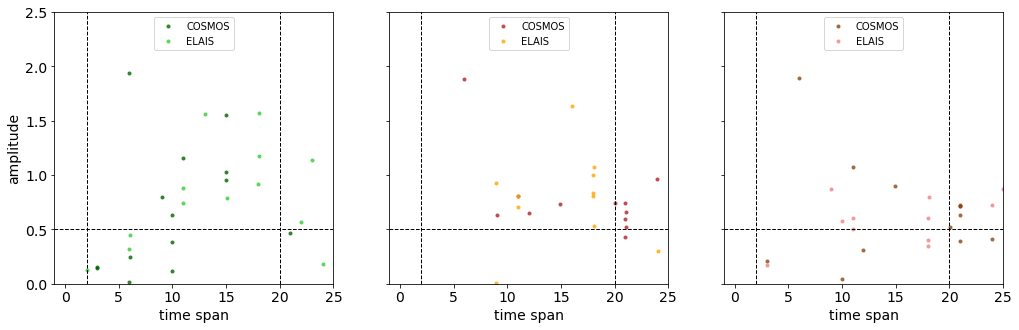

In [34]:
fig, ax = plt.subplots( 1, 3, figsize=(17,5), sharex=True, sharey=True )

### plot all the candidates in parameter space of timespan vs amplitude
tx = np.where((((paramLC_field == 'COSMOS') & (paramLC_tspan_g >= 2) & (paramLC_tspan_g <= 30)) & 
               ((paramLC_tspan_r >= 2) & (paramLC_tspan_r <= 30)) & 
               ((paramLC_tspan_i >= 2) & (paramLC_tspan_i <= 30))) & 
              ((paramLC_minmag_g < 22) | (paramLC_minmag_r < 22) | (paramLC_minmag_i < 22)) &
              ((paramLC_amp_g >= 0.5) | (paramLC_amp_r >= 0.5) | (paramLC_amp_i >= 0.5)))[0]
print('Number of potential fast transients in COSMOS: ',len(tx))
ax[0].plot(paramLC_tspan_g[tx], paramLC_amp_g[tx], 'o', ms=4, mew=0, alpha=0.8, color=clr[0], label='COSMOS')
ax[1].plot(paramLC_tspan_r[tx], paramLC_amp_r[tx], 'o', ms=4, mew=0, alpha=0.8, color=clr[1], label='COSMOS')
ax[2].plot(paramLC_tspan_i[tx], paramLC_amp_i[tx], 'o', ms=4, mew=0, alpha=0.8, color=clr[2], label='COSMOS')
del tx
tx = np.where((((paramLC_field == 'ELAIS') & (paramLC_tspan_g >= 2) & (paramLC_tspan_g <= 30)) & 
               ((paramLC_tspan_r >= 2) & (paramLC_tspan_r <= 30)) & 
               ((paramLC_tspan_i >= 2) & (paramLC_tspan_i <= 30))) & 
              ((paramLC_minmag_g < 22) | (paramLC_minmag_r < 22) | (paramLC_minmag_i < 22)) &
              ((paramLC_amp_g >= 0.5) | (paramLC_amp_r >= 0.5) | (paramLC_amp_i >= 0.5)))[0]
print('Number of potential fast transients in ELAIS: ',len(tx))
ax[0].plot(paramLC_tspan_g[tx], paramLC_amp_g[tx], 'o', ms=4, mew=0, alpha=0.8, color=clr[3], label='ELAIS')
ax[1].plot(paramLC_tspan_r[tx], paramLC_amp_r[tx], 'o', ms=4, mew=0, alpha=0.8, color=clr[4], label='ELAIS')
ax[2].plot(paramLC_tspan_i[tx], paramLC_amp_i[tx], 'o', ms=4, mew=0, alpha=0.8, color=clr[5], label='ELAIS')
del tx

for f in range(3):
    ax[f].axvline(2, lw=1, ls='dashed', color='black')
    ax[f].axvline(20, lw=1, ls='dashed', color='black')
    ax[f].axhline(0.5, lw=1, ls='dashed', color='black')
    
paramLC_potft = np.zeros( len(paramLC_field), dtype='int' )

# paramLC_potft = (paramLC_candid[x])

### finish up the plot and show it
ax[0].set_xlim([-1,25])
ax[1].set_xlim([-1,25])
ax[2].set_xlim([-1,25])
ax[0].set_ylim([0.,2.5])
ax[1].set_ylim([0.,2.5])
ax[2].set_ylim([0.,2.5])
ax[0].set_ylabel('amplitude')
# ax[1,0].set_ylabel('amplitude')
ax[0].set_xlabel('time span')
ax[1].set_xlabel('time span')
ax[2].set_xlabel('time span')
ax[0].legend(loc='best',fontsize=10)
ax[1].legend(loc='best',fontsize=10)
ax[2].legend(loc='best',fontsize=10)
plt.show()

### Write the list of potential fast transients to file

In [15]:
fout = open('potential_fast_transients_list.dat', 'w')
tx = np.where((((paramLC_tspan_g >= 2) & (paramLC_tspan_g <= 30)) & 
               ((paramLC_tspan_r >= 2) & (paramLC_tspan_r <= 30)) & 
               ((paramLC_tspan_i >= 2) & (paramLC_tspan_i <= 30))) & 
              ((paramLC_minmag_g < 22) | (paramLC_minmag_r < 22) | (paramLC_minmag_i < 22)) &
              ((paramLC_amp_g >= 0.5) | (paramLC_amp_r >= 0.5) | (paramLC_amp_i >= 0.5)))[0]
for x in range(len(tx)):
    fout.write(paramLC_candid[tx[x]]+'\n')
fout.close()
print('Number of potential fast transients: ', len(tx))
del tx

Number of potential fast transients:  30


### Plot the potential fast transient lightcurves

Display the time span and the amplitude in the upper left corner.

Some appear to be "short duration" just by being partial lightcurves,
but at least DC22icaog seems to have a rise and fall, just over two weeks.

Total number which met criteria:  30


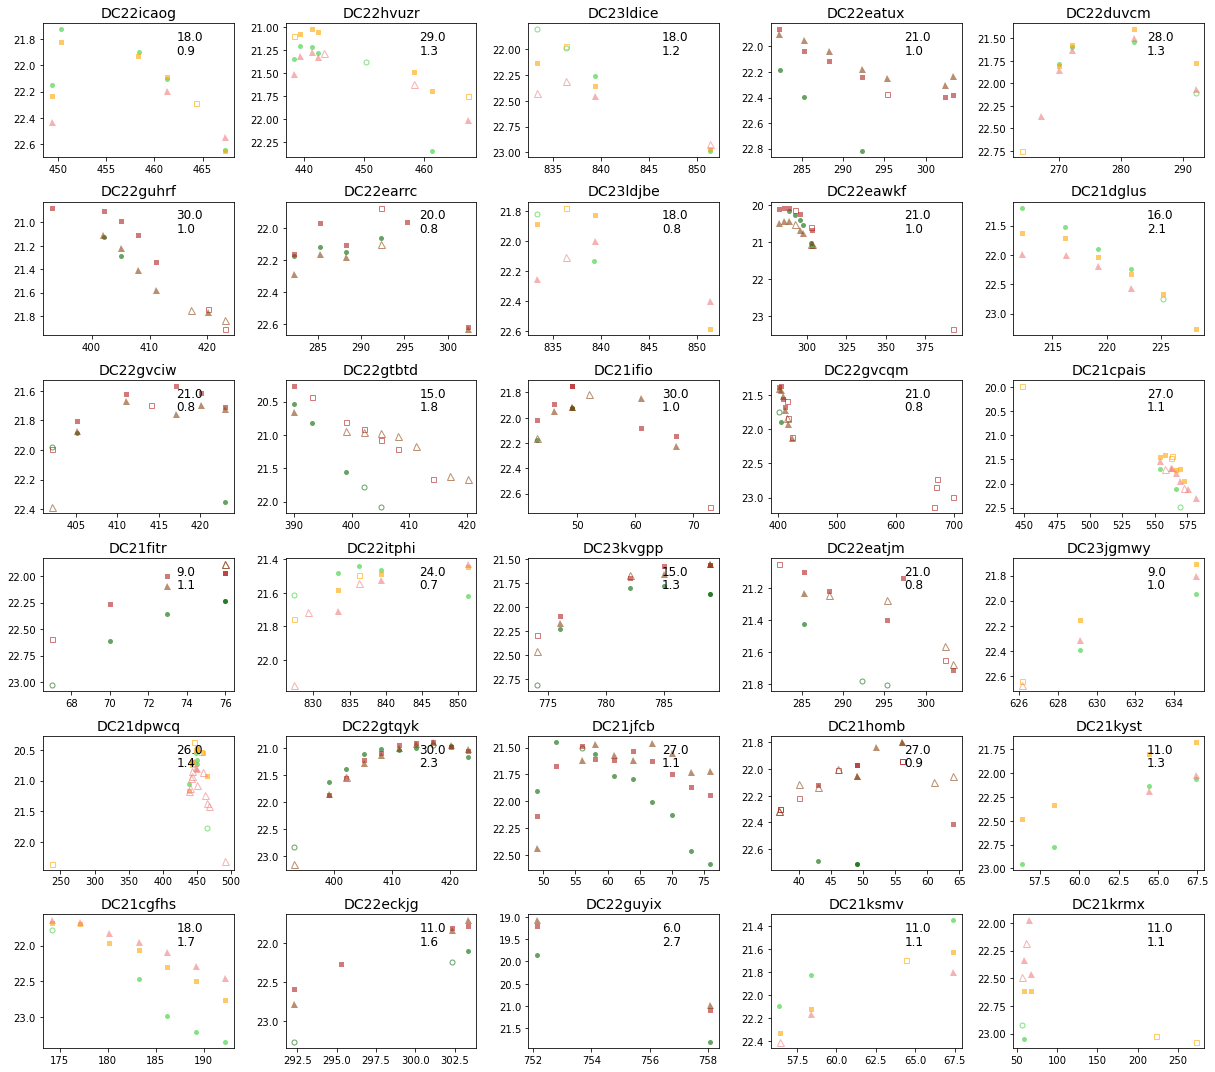

In [19]:
sx = np.where((((paramLC_tspan_g >= 2) & (paramLC_tspan_g <= 30)) & 
               ((paramLC_tspan_r >= 2) & (paramLC_tspan_r <= 30)) & 
               ((paramLC_tspan_i >= 2) & (paramLC_tspan_i <= 30))) & 
              ((paramLC_minmag_g < 22) | (paramLC_minmag_r < 22) | (paramLC_minmag_i < 22)) &
              ((paramLC_amp_g >= 0.5) | (paramLC_amp_r >= 0.5) | (paramLC_amp_i >= 0.5)))[0]
print('Total number which met criteria: ', len(sx))
np.random.shuffle(sx)

fig, ax = plt.subplots( 6, 5, figsize=(17, 15), sharex=False, sharey=False )

s = 0
for i in range(6):
    for j in range(5):
        for f,filt in enumerate(all_filters):
            clr_i = f
            if paramLC_field[sx[s]] == 'ELAIS':
                clr_i = f+3
            cx0 = np.where((candLC_candid == paramLC_candid[sx[s]]) & \
                           (candLC_filter == filt) & (candLC_mrb > 0.4))[0]
            cx1 = np.where((candLC_candid == paramLC_candid[sx[s]]) & \
                           (candLC_filter == filt) & (candLC_mrb <= 0.4))[0]
            ax[i,j].plot( candLC_mjd[cx0]-59300., candLC_mag[cx0], 
                         sym[clr_i], ms=siz[clr_i], mew=0, alpha=0.6, color=clr[clr_i] )
            ax[i,j].plot( candLC_mjd[cx1]-59300., candLC_mag[cx1], 
                         sym[clr_i], ms=siz[clr_i], mew=1, alpha=0.6, mec=clr[clr_i], color='none' )
            del cx0, cx1
        ax[i,j].invert_yaxis()
        ax[i,j].set_title(paramLC_candid[sx[s]], fontsize=14)
        ax[i,j].text(0.70, 0.85, str(np.round(paramLC_tspan[sx[s]],0)), fontsize=12, color='black', 
                     verticalalignment='bottom', horizontalalignment='left',  transform=ax[i,j].transAxes)
        ax[i,j].text(0.70, 0.75, str(np.round(paramLC_amp[sx[s]],1)), fontsize=12, color='black', 
                     verticalalignment='bottom', horizontalalignment='left',  transform=ax[i,j].transAxes)
        s += 1

plt.tight_layout()
plt.show()
del sx,s

### Save individual plots as PNG files

In [20]:
sx = np.where((((paramLC_tspan_g >= 2) & (paramLC_tspan_g <= 30)) & 
               ((paramLC_tspan_r >= 2) & (paramLC_tspan_r <= 30)) & 
               ((paramLC_tspan_i >= 2) & (paramLC_tspan_i <= 30))) & 
              ((paramLC_minmag_g < 22) | (paramLC_minmag_r < 22) | (paramLC_minmag_i < 22)) &
              ((paramLC_amp_g >= 0.5) | (paramLC_amp_r >= 0.5) | (paramLC_amp_i >= 0.5)))[0]

plt.rcParams.update({'font.size': 14})

for x in range(len(sx)):
    plt.figure(figsize=(8,6))

    for f,filt in enumerate(all_filters):
        clr_i = f
        if paramLC_field[sx[x]] == 'ELAIS':
            clr_i = f+3
        cx0 = np.where((candLC_candid == paramLC_candid[sx[x]]) & \
                       (candLC_filter == filt) & (candLC_mrb > 0.4))[0]
        cx1 = np.where((candLC_candid == paramLC_candid[sx[x]]) & \
                       (candLC_filter == filt) & (candLC_mrb <= 0.4))[0]
        plt.plot( candLC_mjd[cx0]-59300., candLC_mag[cx0], 
                     sym[clr_i], ms=siz[clr_i], mew=0, alpha=0.6, color=clr[clr_i], label=filt )
        plt.plot( candLC_mjd[cx1]-59300., candLC_mag[cx1], 
                     sym[clr_i], ms=siz[clr_i], mew=1, alpha=0.6, mec=clr[clr_i], color='none', label=filt+' (R/B<0.4)' )
        del cx0, cx1
    plt.gca().invert_yaxis()
    plt.legend(loc='best', labelspacing=0.1, handletextpad=0.1, fontsize=14)
    plt.title(paramLC_candid[sx[x]])
    # plt.text(0.70, 0.85, str(np.round(paramLC_tspan[sx[x]],0)), fontsize=12, color='black', 
    #              verticalalignment='bottom', horizontalalignment='left',  transform=ax.transAxes)
    # plt.text(0.70, 0.75, str(np.round(paramLC_amp[sx[x]],1)), fontsize=12, color='black', 
    #              verticalalignment='bottom', horizontalalignment='left',  transform=ax.transAxes)
    plt.xlabel('MJD-59300', fontsize=14)
    plt.ylabel('mag',fontsize=14)
    plt.savefig('all_potential_fast_transients_plots/'+paramLC_candid[sx[x]]+'.png')
    plt.close()

del sx

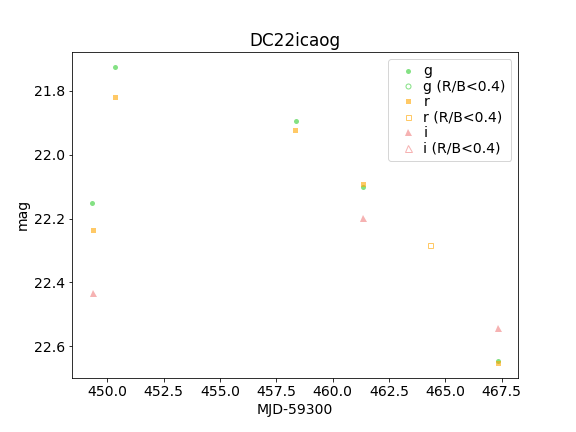

In [21]:
from IPython.display import display, Image
image = Image(filename='../fast_transients/all_potential_fast_transients_plots/DC22icaog.png',width=450)
display(image)

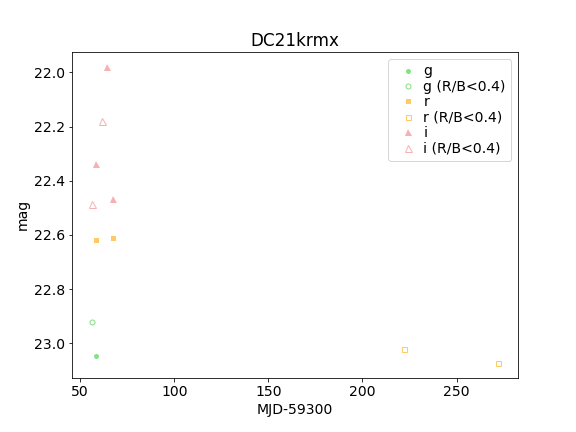

In [22]:
image = Image(filename='../fast_transients/all_potential_fast_transients_plots/DC21krmx.png',width=450)
display(image)

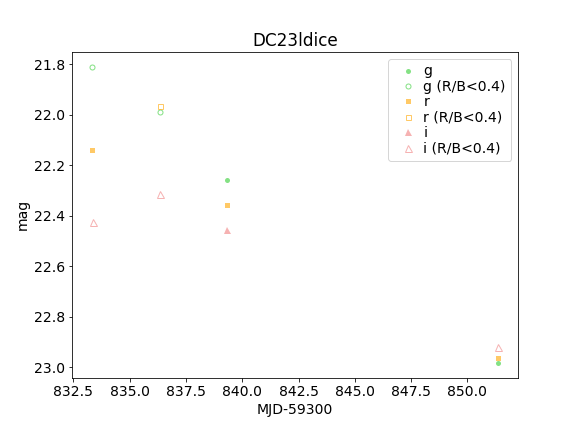

In [23]:
image = Image(filename='../fast_transients/all_potential_fast_transients_plots/DC23ldice.png',width=450)
display(image)

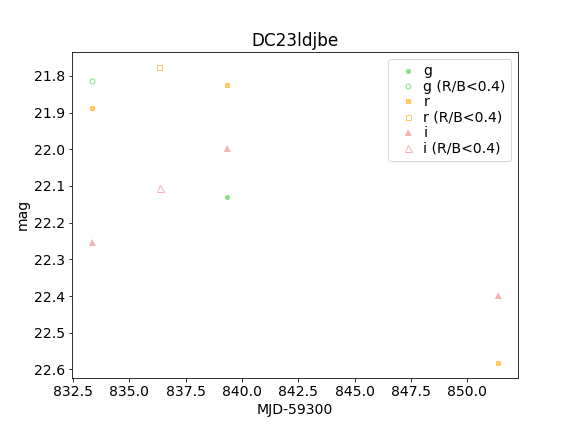

In [24]:
image = Image(filename='../fast_transients/all_potential_fast_transients_plots/DC23ldjbe.png',width=450)
display(image)

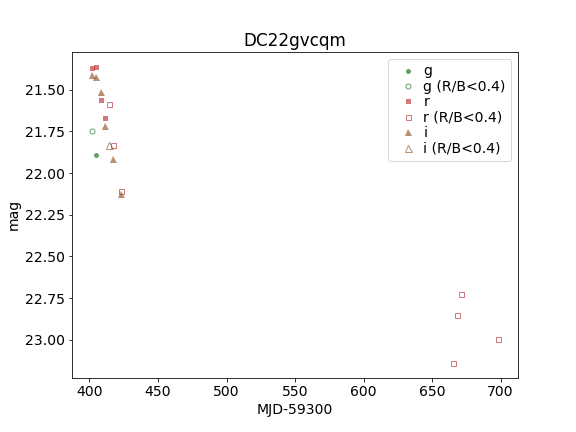

In [28]:
image = Image(filename='../fast_transients/all_potential_fast_transients_plots/DC22gvcqm.png',width=450)
display(image)

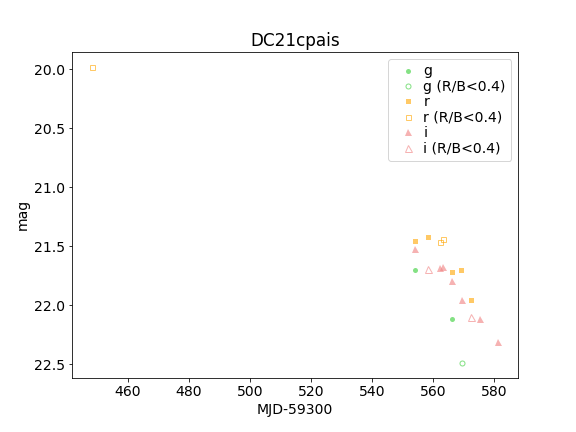

In [29]:
image = Image(filename='../fast_transients/all_potential_fast_transients_plots/DC21cpais.png',width=450)
display(image)

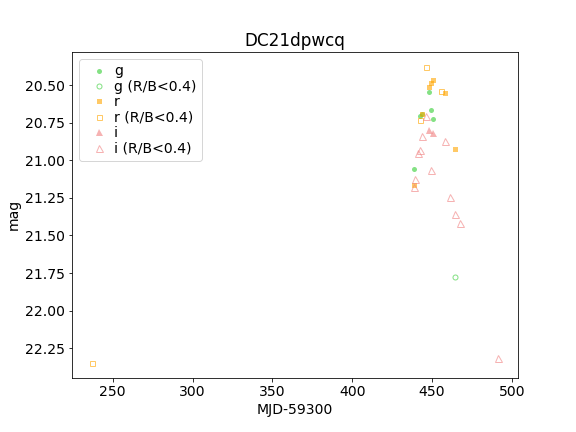

In [32]:
image = Image(filename='../fast_transients/all_potential_fast_transients_plots/DC21dpwcq.png',width=450)
display(image)

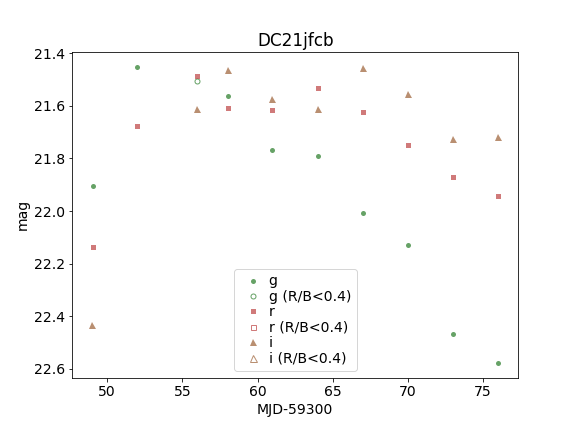

In [33]:
image = Image(filename='../fast_transients/all_potential_fast_transients_plots/DC21jfcb.png',width=450)
display(image)